# Decision Tree

In [5]:
#importing important lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy.stats import zscore
%matplotlib inline
sns.set_style('darkgrid')

# step-0. Loading breast cancer data set using sklearn in df

from sklearn.datasets import load_iris
iris = load_iris()
# converting into data frame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# finding null values 
df.isnull().sum()



sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
print(df.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


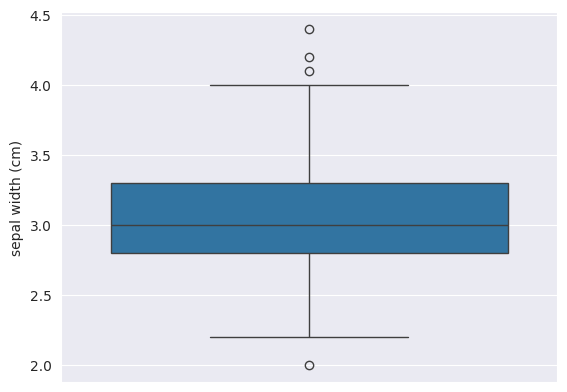

In [8]:
sns.boxplot(df["sepal width (cm)"])
plt.show()

0.5
2.05 4.05


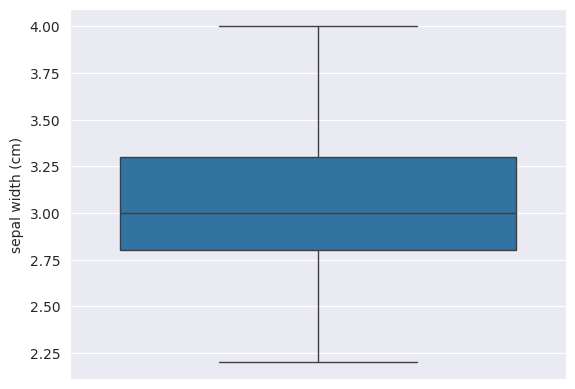

In [11]:
# removing outliers using iqr in sepal width 
q1 = df["sepal width (cm)"].quantile(0.25)
q3 = df["sepal width (cm)"].quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print(lower_bound, upper_bound)
df = df[(df["sepal width (cm)"] > lower_bound) & (df["sepal width (cm)"] < upper_bound)]
sns.boxplot(df["sepal width (cm)"])
plt.show()


0.9545454545454546


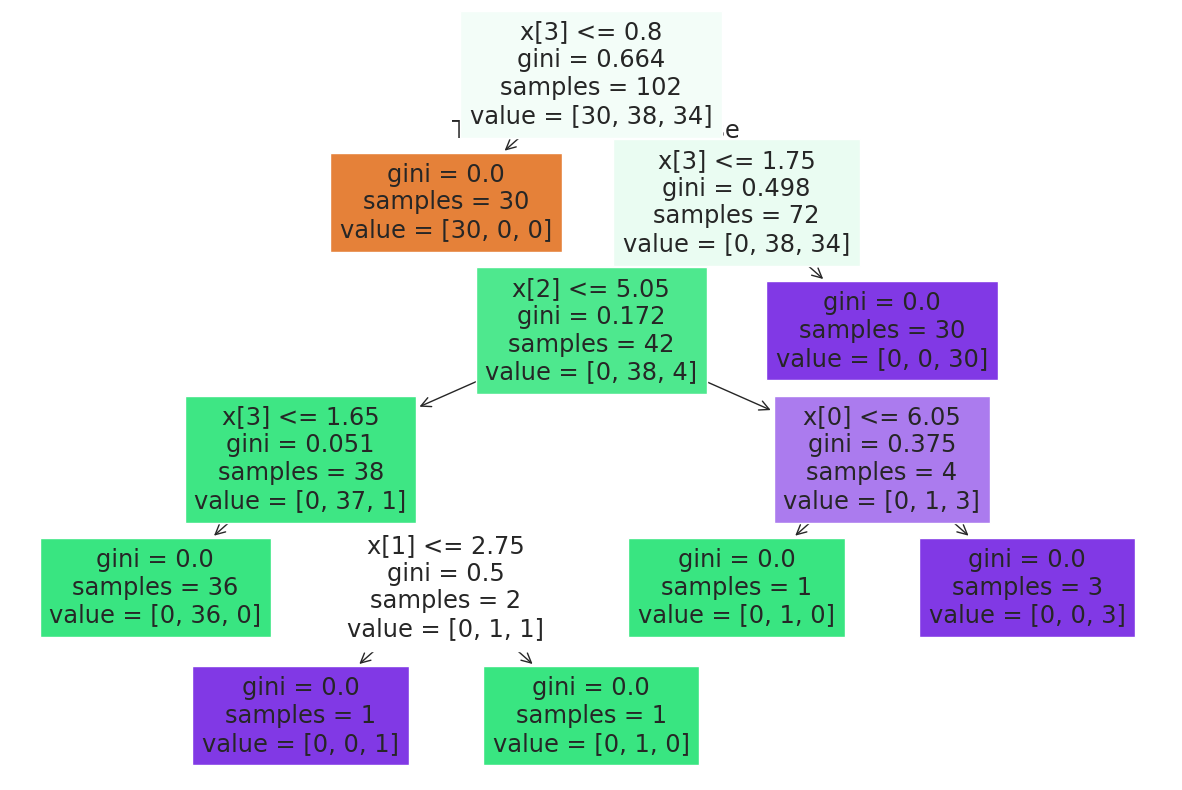

In [16]:
#now applying decision tree classifier on the data set then we will check the accuracy of the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('target', axis=1)
y = df['target']

#now splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#now training the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#now predicting the model and checking the accuracy of the model
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


#now printing desicion tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)
plt.show()








